### Support Vector Machine
- Similar to logistic regression without kernel trick
- Many kernels can be used to classify non linearly seperable data
- Allows use of kernels with good performance as alpha is zero for most features in 
    dual form.
- Thus kernel trick used in SVM and not in logistic regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.datasets import make_circles
from sklearn import preprocessing
from implementation.SupportVectorMachine import SupportVectorMachine
plt.style.use('ggplot')
%matplotlib inline

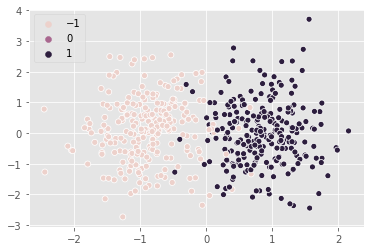

In [2]:
x, y = make_classification(n_samples = 1000, n_features = 2, n_redundant = 0, n_informative = 1,
                             n_clusters_per_class = 1, random_state = 14)
x = preprocessing.scale(x)

x_test = x[:500]
y_test = y[:500]
x = x[500:]
y = y[500:]

y = np.where(y == 0, -1, 1)
y_test = np.where(y_test == 0, -1, 1)

sns.scatterplot(x[:,0],x[:,1],hue=y.reshape(-1))

In [3]:
def visualize(model, title):
    print("Test Accuracy = {}".format(model.evaluate(x_test, y_test)))
    x1 = np.arange(-5, 6, 0.3)
    x2 = np.arange(-5,4,0.3)
    for i in range(len(x1)):
        for j in range(len(x2)):
            pred = model.predict(np.array([np.array(np.array([x1[i], x2[j]]))]))[0]
            if(pred > 0.5):
                plt.scatter(x1[i], x2[j], c = "b")
            else:
                plt.scatter(x1[i], x2[j], c = "c")
    plt.title(title)
    plt.show()

In [4]:
model=SupportVectorMachine(C = 20)
model.fit(x, y, epochs = 20,print_every_nth_epoch = 2, learning_rate = 0.01)
print("Training Accuracy = {}".format(model.evaluate(x,y)))


--------------- Epoch 2 --> Loss = 17.107903830512612 ---------------
--------------- Epoch 4 --> Loss = 11.491814161773398 ---------------
--------------- Epoch 6 --> Loss = 7.344601382240654 ---------------
--------------- Epoch 8 --> Loss = 5.631284677542619 ---------------
--------------- Epoch 10 --> Loss = 4.902263990035424 ---------------
--------------- Epoch 12 --> Loss = 4.645250102822413 ---------------
--------------- Epoch 14 --> Loss = 4.5819988995860985 ---------------
--------------- Epoch 16 --> Loss = 4.6272508059277255 ---------------
--------------- Epoch 18 --> Loss = 4.757101640092175 ---------------
--------------- Epoch 20 --> Loss = 4.946581179253037 ---------------
Training Accuracy = 0.96


Test Accuracy = 0.962


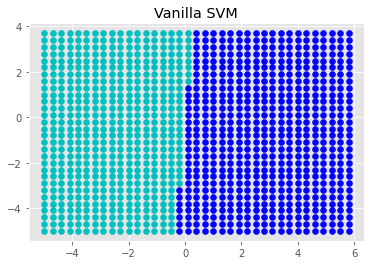

In [5]:
visualize(model,"Vanilla SVM")

### Using The Kernel Trick

- Here we will use gaussian Kernel
- It use transforms a feature vector to a vector containing similatity with all the training data points.
- Thus increasing the number of features to size of training data
- The similarity function gives value between 0 to 1 depending upon how similar two vectors are
- Sigma square dictates how rapidly the walue will fall as we move away from a vectors
- This can be used to create non linear classification boundry

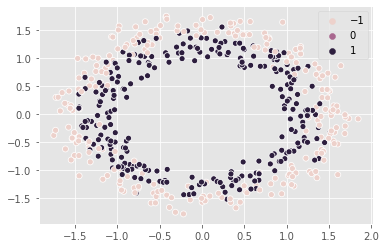

In [6]:
x, y = make_circles(n_samples = 1000, noise = 0.09)
x = preprocessing.scale(x)

x_test = x[:500]
y_test = y[:500]
x = x[500:]
y = y[500:]

y = np.where(y == 0, -1, 1)
y_test = np.where(y_test == 0, -1, 1)

sns.scatterplot(x[:, 0], x[:, 1], hue = y.reshape(-1))

In [7]:
model = SupportVectorMachine(C = 10, kernel = "gaussian", sigma_sq = 0.01)
model.fit(x, y, epochs = 20, print_every_nth_epoch = 2, learning_rate = 0.01)
print("Training Accuracy = {}".format(model.evaluate(x, y)))

--------------- Epoch 2 --> Loss = 9.975435635905118 ---------------
--------------- Epoch 4 --> Loss = 9.927513128909165 ---------------
--------------- Epoch 6 --> Loss = 9.881469330420758 ---------------
--------------- Epoch 8 --> Loss = 9.83723040345528 ---------------
--------------- Epoch 10 --> Loss = 9.794725416686552 ---------------
--------------- Epoch 12 --> Loss = 9.753886230028176 ---------------
--------------- Epoch 14 --> Loss = 9.714647384721927 ---------------
--------------- Epoch 16 --> Loss = 9.676945997755631 ---------------
--------------- Epoch 18 --> Loss = 9.640721660439919 ---------------
--------------- Epoch 20 --> Loss = 9.605916340980082 ---------------
Training Accuracy = 0.86


Test Accuracy = 0.812


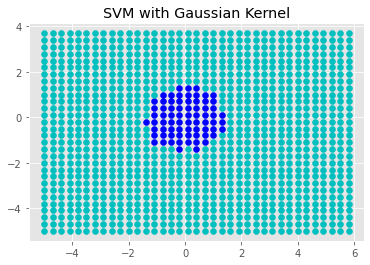

In [8]:
visualize(model,"SVM with Gaussian Kernel")